<a href="https://colab.research.google.com/github/gonzalo-marrero/QUIJOTE_AperturePhotometry/blob/main/Fotometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO FOTOMETRÍA APERTURA.

In [ ]:
#Se importan los módulos necesarios para la resolución del ejercicio.
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import argparse
import numpy as np
import astropy.io.fits as pyfits
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit


In [ ]:
#Se declaran las constantes necesarias.
kb = 1.38E-23  #J/K #Constante de Boltzmann.
c=3E8 #m/s #Velocidad de la luz.
omega= 2.12e-6 #Omega Solid_Angle

In [ ]:
#Se agrupan los ficheros fits. en una lista.
fits_all = ['quijote11_crab.fits','quijote13_crab.fits','quijote17_crab.fits','quijote19_crab.fits']
titles = ['11 GHz', '13 GHz', '17 GHz', '19 GHz']
#Se calculan las FWHM, y se almacenan en un array:
FWHM_all = np.array([55.4,55.8,39.1,40.5])/1.5  # in pixel # Las FWHM vienen en arcmin.Se pasan a pixel, dividiendo por 1.5
#En un array, se almacenan todas las frecuencias, en GHz.
freqs_all = np.array([11,13,17,19])
#Se crea una lista vacía, donde se irán almacenando los valores de flujo.
fluxes = []


DATA FOR: quijote11_crab.fits


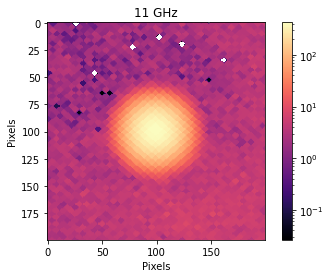

Mean background noise =  8.598343263012868


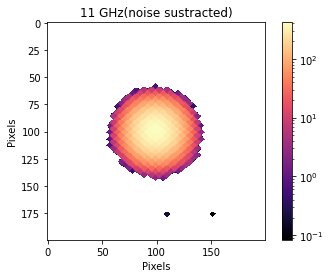

surface (number of px) = 4281
sum of temperature = (K)  592.7928486307271
Integrated I_mu = (Jy)  4663.272126943113

DATA FOR: quijote13_crab.fits


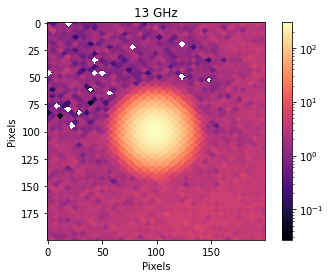

Mean background noise =  5.589496158569593


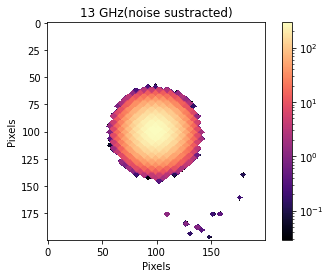

surface (number of px) = 4349
sum of temperature = (K)  415.8864644783546
Integrated I_mu = (Jy)  4569.449943128036

DATA FOR: quijote17_crab.fits


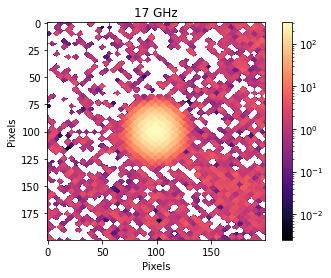

Mean background noise =  4.913697431948679


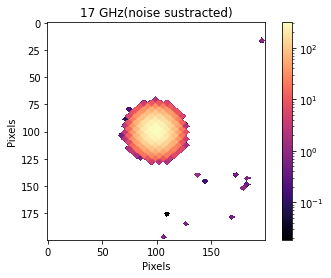

surface (number of px) = 2129
sum of temperature = (K)  219.58905122343486
Integrated I_mu = (Jy)  4125.826477043021

DATA FOR: quijote19_crab.fits


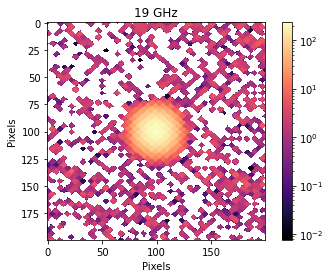

Mean background noise =  2.120784271530234


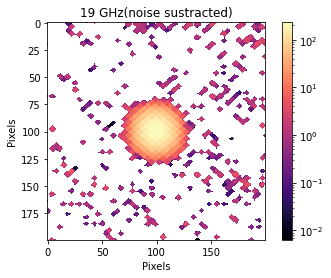

surface (number of px) = 2285
sum of temperature = (K)  172.49725016462523
Integrated I_mu = (Jy)  4048.478261877013

FIT TO POWER LAW
[-2.79431287e-01  9.19881010e+03] [[ 1.36706665e-03 -3.34384314e+01]
 [-3.34384314e+01  8.23298979e+05]]


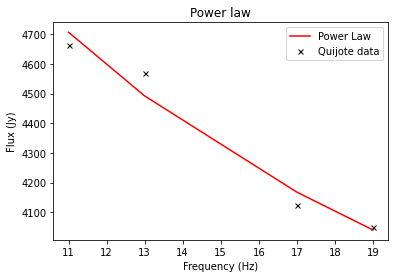

In [ ]:
def bn_sustraction(matrix,fwhm):
    plt.figure()
    plt.imshow(matrix, cmap='magma',norm=LogNorm())
    plt.grid(False)
    cbar = plt.colorbar()
    plt.xlabel('Pixels')
    plt.ylabel('Pixels')
    plt.title(title)
    plt.show()

    r1 = fwhm  # in arcmin
    r2 = fwhm*(2**0.5)


    for i in range(len(matrix[0])):  # selecciono pixeles dentro de un anillo de radios r1,r2
        for j in range(len(matrix[0])):
            dist = ((i-100)**2 + (j-100)**2)**0.5
            if r1 < dist and dist < r2:
                idx_row.append(i)
                idx_col.append(j)
                bn_cells.append(matrix[i][j])

    mean_bn = np.mean(bn_cells)
    print('Mean background noise = ', mean_bn)

    matrix_sus = matrix - mean_bn

    plt.figure()
    plt.imshow(matrix_sus, cmap='magma', norm = LogNorm())
    plt.grid(False)
    cbar = plt.colorbar()
    plt.xlabel('Pixels')
    plt.ylabel('Pixels')
    plt.title(title + '(noise sustracted)')
    plt.show()

    number_of_pixels = 0
    temp_total = 0
    I_mu_igd = 0


    for i in range(len(matrix[0])):  # sumo flujos (temperaturas) del circulo con r1
        for j in range(len(matrix[0])):
            dist = ((i-100)**2 + (j-100)**2)**0.5
            if dist<r1:
                temp_total = temp_total + matrix_sus[i][j]
                number_of_pixels = number_of_pixels + 1
                I_mu_igd = I_mu_igd + (2*kb*matrix_sus[i][j]*1e-3*(freq*1e9)**2)*omega/c**2

    fluxes.append(I_mu_igd*1e26)

    print('surface (number of px) =',number_of_pixels)
    print('sum of temperature = (K) ', temp_total/1000 )
    print('Integrated I_mu = (Jy) ', I_mu_igd*1e26)
    print()

    return matrix_sus,mean_bn



for i in range(len(fits_all)):
    crab_im = fits.open(fits_all[i])
    crab = crab_im[0].data
    bn_cells = []
    idx_row = []
    idx_col = []
    matrix_sus = np.array([])
    freq = freqs_all[i]
    title = titles[i]
    print('===========================')
    print('DATA FOR:',fits_all[i])
    print('============================')
    bn_sustraction(crab,FWHM_all[i])


print('FIT TO POWER LAW')

def func(x,alpha,a):
    return a*(x**alpha) #Obtener alpha

xdata = freqs_all
ydata = fluxes
popt, pcov = curve_fit(func, xdata, ydata)

print(popt,pcov)
plt.plot(xdata, func(xdata, *popt), 'r-',label='Power Law')
plt.plot(xdata,ydata,'k x',markersize=5,label='Quijote data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (Jy)')
plt.title('Power law')
plt.legend()
plt.show()







